<a href="https://colab.research.google.com/github/manish2393cool/ML-Python/blob/master/8_SVM_with_kernal_Linear_poly_rbf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

In [0]:
path = '/content/'
df_1 = pd.read_excel(path+'ex2data1-logistic.xls')
df_2 = pd.read_excel(path+'ex2data2-logistic.xls')
# dividing the dateset into 90:10 ratio
N=90

In [0]:
df_1_norm = (df_1-df_1.mean())/df_1.std()
df_2_norm = (df_2-df_2.mean())/df_2.std()

In [0]:
np_1_train =  np.array(df_1_norm[0:N].values)
np_1_test =   np.array(df_1_norm[N:99].values)
np_2_train =  np.array(df_2_norm[0:N].values)
np_2_test =   np.array(df_2_norm[N:99].values)

In [0]:
np_1_train[:,2] = np.array(df_1[0:N]["y"].values)
np_1_test[:,2] = np.array(df_1[N:99]["y"].values)
np_2_train[:,2] = np.array(df_2[0:N]["y"].values)
np_2_test[:,2] = np.array(df_2[N:99]["y"].values)

In [0]:
np_1 = np.array(df_1.values)
np_2 = np.array(df_2.values)

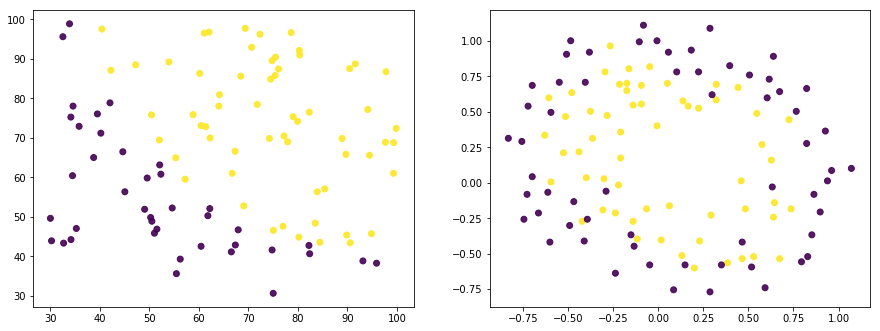

In [8]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)

groups = ("0", "1")
ax.scatter(df_1.iloc[:,0], df_1.iloc[:,1], alpha=0.9, c=df_1.iloc[:,2], label=groups)
bx.scatter(df_2.iloc[:,0], df_2.iloc[:,1],alpha=0.9, c=df_2.iloc[:,2], label=groups)

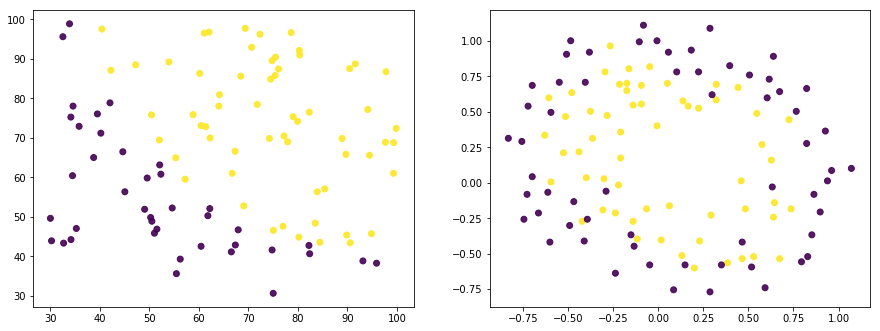

In [9]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)

groups = ("0", "1")
ax.scatter(np_1[:,0], np_1[:,1], alpha=0.9, c=np_1[:,2], label=groups)
bx.scatter(np_2[:,0], np_2[:,1],alpha=0.9, c=np_2[:,2], label=groups)

## Linear SVC using sklearn.svm

In [0]:
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=0, tol=1e-5)

In [11]:
model.fit(np_1_train[:,0:2], np_1_train[:,2])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [12]:
print(model.coef_)
print(model.intercept_)
print(model.predict(np_1_test[:,0:2]))
print(model.get_params)

# printing predictions
print(np_1_test[:,2])

[[1.17264662 1.07186201]]
[0.43684582]
[1. 1. 0. 1. 1. 1. 1. 1. 0.]
<bound method BaseEstimator.get_params of LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)>
[1. 1. 0. 1. 1. 1. 1. 1. 1.]


## On First dataset

---



In [13]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(np_1_train[:,0:2], np_1_train[:,2])
print(clf.predict(np_1_test[:,0:2]))
print(np_1_test[:,2])

[1. 1. 0. 1. 1. 1. 1. 1. 0.]
[1. 1. 0. 1. 1. 1. 1. 1. 1.]


## Plotting Linear SVM decision line

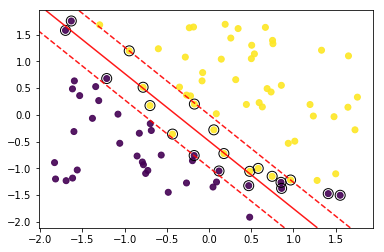

In [14]:
# plot the decision function
plt.scatter(np_1_train[:,0], np_1_train[:,1], alpha=0.9, c=np_1_train[:,2])
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# print(XX, YY, Z)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.9,linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.show()
bx.scatter(np_1_train[:,0], np_1_train[:,1], alpha=0.9, c=np_1_train[:,2])
bx.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [15]:
# printing support vectors from above example
print(clf.support_vectors_)

[[ 1.55293123 -1.50659457]
 [ 0.11833462 -1.05169521]
 [ 1.41174843 -1.47563084]
 [-1.63061011  1.75686481]
 [ 0.46998018 -1.32642042]
 [ 0.85950707 -1.37782069]
 [-0.17584331 -0.7620498 ]
 [-1.69938823  1.58084768]
 [ 0.85220465 -1.2647255 ]
 [-1.21125246  0.67927328]
 [ 0.48208266 -1.05839822]
 [ 0.96558389 -1.22094762]
 [ 0.17606285 -0.72548489]
 [ 0.58250489 -1.00340376]
 [-0.17335912  0.20085581]
 [ 0.74754551 -1.15162347]
 [-0.69887522  0.17278693]
 [ 0.056657   -0.28147582]
 [-0.94458809  1.19755296]
 [-0.78044716  0.51595401]
 [-0.43198025 -0.36096402]]


## On second dataset

---



In [16]:
from sklearn import svm
model_2 = svm.SVC(kernel='linear', C=1000)
model_2.fit(np_2_train[:,0:2], np_2_train[:,2])
print(model_2.predict(np_2_test[:,0:2]))
print(np_2_test[:,2])

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


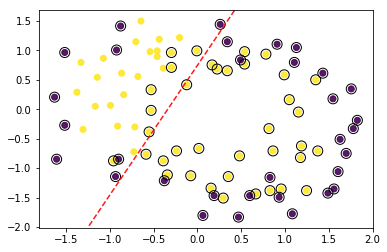

In [17]:
# plot the decision function
plt.scatter(np_2_train[:,0], np_2_train[:,1], alpha=0.9, c=np_2_train[:,2])
# fig = plt.figure(figsize=(15, 12))
# ax = fig.add_subplot(221)
# bx = fig.add_subplot(222)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_2.decision_function(xy).reshape(XX.shape)
# print(XX, YY, Z)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.9,linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(model_2.support_vectors_[:, 0], model_2.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.show()
# bx.scatter(np_1_train[:,0], np_1_train[:,1], alpha=0.9, c=np_1_train[:,2], label=groups)
# bx.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')

# plt.show()
ax.scatter(model_2.support_vectors_[:, 0], model_2.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## On second dataset

---



## On First dataset use POLY kernal from SVM

---



In [18]:
from sklearn import svm
clf = svm.SVC(kernel='poly', C=1000)
clf.fit(np_1_train[:,0:2], np_1_train[:,2])
print(clf.predict(np_1_test[:,0:2]))
print(np_1_test[:,2])

[1. 1. 0. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


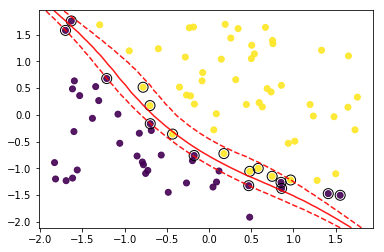

In [19]:
# plot the decision function
plt.scatter(np_1_train[:,0], np_1_train[:,1], alpha=0.9, c=np_1_train[:,2])
# fig = plt.figure(figsize=(15, 12))
# ax = fig.add_subplot(221)
# bx = fig.add_subplot(222)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# print(XX, YY, Z)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.9,linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.show()
bx.scatter(np_1_train[:,0], np_1_train[:,1], alpha=0.9, c=np_1_train[:,2])
bx.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [20]:
print(clf.support_vectors_)

[[ 1.55293123 -1.50659457]
 [ 1.41174843 -1.47563084]
 [-0.69565935 -0.16651835]
 [-1.63061011  1.75686481]
 [ 0.46998018 -1.32642042]
 [ 0.85950707 -1.37782069]
 [-0.17584331 -0.7620498 ]
 [-1.69938823  1.58084768]
 [ 0.85220465 -1.2647255 ]
 [-1.21125246  0.67927328]
 [ 0.48208266 -1.05839822]
 [ 0.96558389 -1.22094762]
 [ 0.17606285 -0.72548489]
 [ 0.58250489 -1.00340376]
 [ 0.74754551 -1.15162347]
 [-0.69887522  0.17278693]
 [-0.78044716  0.51595401]
 [-0.43198025 -0.36096402]]


## On First dataset use RBF kernal from SVM

---



In [21]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(np_1_train[:,0:2], np_1_train[:,2])
print(clf.predict(np_1_test[:,0:2]))
print(np_1_test[:,2])

[1. 1. 0. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


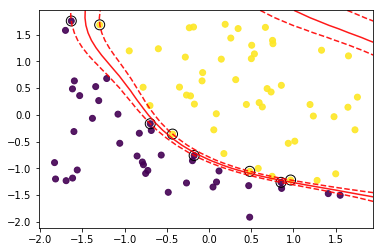

In [22]:
# plot the decision function
plt.scatter(np_1_train[:,0], np_1_train[:,1], alpha=0.9, c=np_1_train[:,2])
# fig = plt.figure(figsize=(15, 12))
# ax = fig.add_subplot(221)
# bx = fig.add_subplot(222)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# print(XX, YY, Z)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.9,linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.show()
bx.scatter(np_1_train[:,0], np_1_train[:,1], alpha=0.9, c=np_1_train[:,2])
bx.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [23]:
print(clf.support_vectors_)

[[-0.69565935 -0.16651835]
 [-1.63061011  1.75686481]
 [-0.17584331 -0.7620498 ]
 [ 0.85220465 -1.2647255 ]
 [ 0.48208266 -1.05839822]
 [ 0.96558389 -1.22094762]
 [-1.29440001  1.68506447]
 [-0.43198025 -0.36096402]]


## On Second dataset use RBF kernal from SVM

---



In [24]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(np_2_train[:,0:2], np_2_train[:,2])
print(clf.predict(np_2_test[:,0:2]))
print(np_2_test[:,2])

[0. 0. 1. 1. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


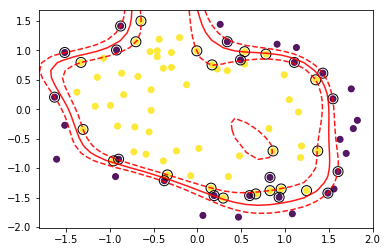

In [25]:
# plot the decision function
plt.scatter(np_2_train[:,0], np_2_train[:,1], alpha=0.9, c=np_2_train[:,2])
# fig = plt.figure(figsize=(15, 12))
# ax = fig.add_subplot(221)
# bx = fig.add_subplot(222)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# print(XX, YY, Z)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=0.9,linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.show()
bx.scatter(np_2_train[:,0], np_2_train[:,1], alpha=0.9, c=np_2_train[:,2])
bx.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()


In [26]:
print(clf.support_vectors_)

[[ 0.34088352  1.14839169]
 [ 0.49165253  0.83896948]
 [ 1.10636645  0.79677555]
 [ 1.43111984  0.61393515]
 [ 1.54711613  0.17793112]
 [ 1.60510421 -1.05973848]
 [ 1.48910792 -1.42541927]
 [ 0.93240221 -1.4957425 ]
 [ 0.82800353 -1.158191  ]
 [ 0.59605121 -1.46761321]
 [ 0.19009437 -1.46761321]
 [-0.37820895 -1.21444958]
 [-0.90014194 -0.84876879]
 [-1.63083203  0.20606042]
 [-1.51485587  0.9655513 ]
 [-0.92333718  1.00774523]
 [-0.87694671  1.41561997]
 [-0.00707114  0.99368059]
 [ 0.15530153 -1.34103139]
 [ 0.6656369  -1.43948392]
 [ 0.95559744 -1.35509604]
 [ 1.37313176 -0.70812233]
 [-1.32927387  0.79677555]
 [-1.30607864 -0.34244731]
 [-0.95813002 -0.87689808]
 [-0.3434161  -1.11599706]
 [ 0.29449305 -1.50980715]
 [ 0.82800353 -1.38322533]
 [ 1.24555798 -1.38322533]
 [-0.70296234  1.14839169]
 [-0.64497425  1.50000784]
 [ 0.86279638 -0.70812233]
 [ 1.34993652  0.50141798]
 [ 0.78161307  0.937422  ]
 [ 0.53804299  0.97961594]
 [ 0.16689914  0.75458161]]
